# COMPSCI 389: Introduction to Machine Learning
# Classification

So far we have focussed on **regression** problems in supervised learning. In this notebook, we discuss how the ideas we have discussed carry over to the **classification** setting. Recall that in the classification setting the labels are discrete (nominal or ordinal) values rather than real-valued numbers.

The conversion from regression to classification is relatively straightforward. We must:

1. Change the parametric model being used so that it outputs a discrete label as a prediction rather than a real number.
2. Select a loss function that is appropriate for classification tasks.

**Note**: There are non-parametric ML methods for classification, like decision trees, which are beyond the scope of this course.

### Parametric Models for Classification

If there are $m$ possible values for the label, then parametric models for classification typically have $m$ outputs rather than one output. For an *artificial neural network* (ANN), this means that the output layer has one unit for each possible label.

Note that we will refer to each possible label as a **class**.

There are two standard ways of mapping these $m$ outputs to a specific label prediction:

1. **Deterministic**: The class with the highest output value is chosen as the predicted class. This approach is simple, but it results in the loss function typically having a gradient of zero. This is because, if the output associated with one class is $1$ and the output associated with another class is $1.5$, small changes to the weights may change these values slightly, but not enough to alter the resulting prediction. Hence small changes to the weights do not change the predictions, and hence do not change the loss.

2. **Stochastic**: The $m$ outputs are used to create a probability distribution over the possible label values, and the predicted label is sampled from this distribution. The most common way of doing this is using the **softmax** function.

#### Softmax Function

The **softmax** function doesn't just select the largest of the $m$ values (like "max" would), but rather selects the largest most often. However, there are some challenges to convert the $m$ output values, $\text{out}_1, \text{out}_2, \dotsc, \text{out}_m$ into probabilities for labels $1, 2, \dotsc, m$.

First, the values $out_k$ (for $k \in \{1,\dotsc,m\}$) can be negative, while probabilities cannot be negative. To resolve this, we exponentiate each of the $\text{out}_k$ values. This ensures that all are at least zero. We now have $m$ values, $e^{\text{out}_1}, e^{\text{out}_2}, \dotsc, e^{\text{out}_m}$.

While all of these are positive, they do not necessarily sum to one. For any probability distribution, the sum of the probabilities of all possible outcomes must be one. To fix this, we divide each output by the sum of the outputs. This gives:

$$
\frac{e^{\text{out}_1}}{\sum_{k=1}^m  e^{\text{out}_k}}, \frac{e^{\text{out}_2}}{\sum_{k=1}^m  e^{\text{out}_k}}, \dotsc, \frac{e^{\text{out}_m}}{\sum_{k=1}^m  e^{\text{out}_k}}.
$$

We can now view these as probabilities! That is, the probability that the prediction is the $\hat y^\text{th}$ label class is:
$$
\Pr(\hat Y_i = \hat y) = \frac{e^{\text{out}_{\hat y}}}{\sum_{k=1}^m e^{\text{out}_k}}.
$$

### Binary Classification

Note that binary classification is a special case. When there are only two possible labels, we do not need a network (parametric model) with two outputs. Instead, we can use a single output that is used to represent the probability of one of the classes (usually the "positive" class). The probability of the other class is one minus the probability of the positive class.

In these cases, we must ensure that the one output of the network can be viewed as a probability. That is, it must be between zero and one. Hence, a sigmoid function like the logistic function is usually applied to the output of the parametric model to squash it to the range $(0,1)$.

Hence, if the network only has one output, $\text{out}_1$:

$$
\Pr(\hat Y_i = 1) = \sigma(\text{out}_1),
$$
where $\sigma(z) = \frac{1}{1+e^{-z}}$, and
$$
\Pr(\hat Y_i = 0) = 1 - \Pr(\hat Y_i = 1).
$$

## Cross-Entropy Loss (Log Loss)

The most common loss function used for classification is **cross-entropy loss** (also called **log loss**). 

In both the binary and multiclass classification settings, the Cross-Entropy Loss is:
$$
\text{Cross-Entropy Loss}(w,D) = -\frac{1}{n}\sum_{i=1}^n \ln \Big (\Pr(Y_i = \hat Y_i)\Big ).
$$
That is, the sum over all $n$ points, of the natural logarithm of the probability that the model selects the correct label. The inclusion of $\frac{1}{n}$ does not make a significant difference, since it simply re-scaled the loss function (it may or may not be included).




## Logistic Regression

Logistic regression is a particularly common method for classification. It is the "linear parametric model" of binary classification. Specifically, the probability that it outputs a label of $1$ is:
$$
\Pr(\hat Y_i=1 | X_i)=\frac{1}{1+e^{-w\cdot \phi(X_i)}}=\sigma(w \cdot \phi(X_i)).
$$
Notice that this is simply the logistic function (sigmoid) applied to a linear parametric model, mapping its output to the range $(0,1)$ so that it can be viewed as a probability (the probability of the positive label). This parametric model for binary classification is called the **logistic model** or **logit model**.

Logistic regression models are typically trained to maximize the "likelihood" of the observed data (the precise definition of likelihood in this context is beyond the scope of this class). It can be shown that this is precisely equivalent to minimizing the Cross-Entropy Loss. **Hence, logistic regression equates to using a logit model and the cross-entropy loss.**

# Example: Iris Data Set

We can now train parametric models for classification! In the following code we train an ANN on the Iris data set using cross-entropy loss.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)    # NOTE: The labels are now integers

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.5, random_state=42)

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 4 input features, 10 hidden nodes
        self.fc2 = nn.Linear(10, 3)  # 3 output classes NOTE: One output per class

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch 1/10000, Training Loss: 1.3809908628463745, Test Loss: 1.386336326599121
Epoch 2/10000, Training Loss: 1.3658846616744995, Test Loss: 1.3741258382797241
Epoch 3/10000, Training Loss: 1.3511279821395874, Test Loss: 1.3622355461120605
Epoch 4/10000, Training Loss: 1.3367257118225098, Test Loss: 1.350675344467163
Epoch 5/10000, Training Loss: 1.3226876258850098, Test Loss: 1.3394553661346436
Epoch 6/10000, Training Loss: 1.3090260028839111, Test Loss: 1.3285852670669556
Epoch 7/10000, Training Loss: 1.2957524061203003, Test Loss: 1.3180738687515259
Epoch 8/10000, Training Loss: 1.2828891277313232, Test Loss: 1.30794358253479
Epoch 9/10000, Training Loss: 1.270450472831726, Test Loss: 1.2982019186019897
Epoch 10/10000, Training Loss: 1.2584359645843506, Test Loss: 1.2888445854187012
Epoch 11/10000, Training Loss: 1.2468583583831787, Test Loss: 1.2798775434494019
Epoch 12/10000, Training Loss: 1.2357237339019775, Test Loss: 1.2712684869766235
Epoch 13/10000, Training Loss: 1.225046992

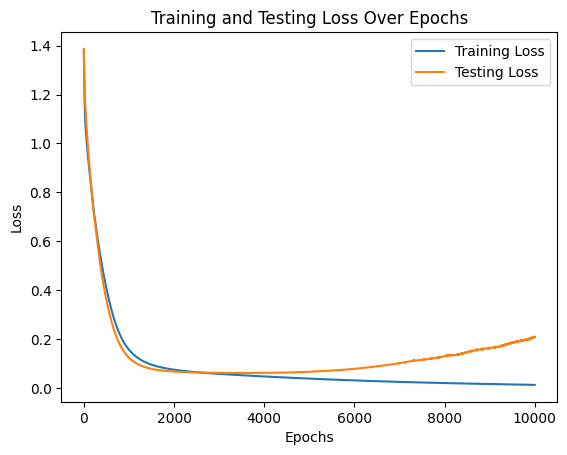

In [2]:
model = ANN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()   # NOTE: We select a classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10000
train_losses = []
test_losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluation step on testing set
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Plotting the training and testing losses over epochs
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()


# Evaluation

From the run above, it seems like we should stop training after around 3,000 epochs. Let's re-run the training, stopping at 3,000 epochs, after which we will discuss further how this model can be evaluated.

Epoch 1/3000, Training Loss: 1.2640759944915771, Test Loss: 1.27169930934906
Epoch 2/3000, Training Loss: 1.2523120641708374, Test Loss: 1.2588136196136475
Epoch 3/3000, Training Loss: 1.2410619258880615, Test Loss: 1.246541976928711
Epoch 4/3000, Training Loss: 1.2302714586257935, Test Loss: 1.234955906867981
Epoch 5/3000, Training Loss: 1.2199515104293823, Test Loss: 1.224029541015625
Epoch 6/3000, Training Loss: 1.210060477256775, Test Loss: 1.2137163877487183
Epoch 7/3000, Training Loss: 1.2006133794784546, Test Loss: 1.2039904594421387
Epoch 8/3000, Training Loss: 1.1915860176086426, Test Loss: 1.1948440074920654
Epoch 9/3000, Training Loss: 1.1829493045806885, Test Loss: 1.1862380504608154
Epoch 10/3000, Training Loss: 1.1747429370880127, Test Loss: 1.178145408630371
Epoch 11/3000, Training Loss: 1.1669117212295532, Test Loss: 1.1705280542373657
Epoch 12/3000, Training Loss: 1.1594367027282715, Test Loss: 1.163350224494934
Epoch 13/3000, Training Loss: 1.1523357629776, Test Loss:

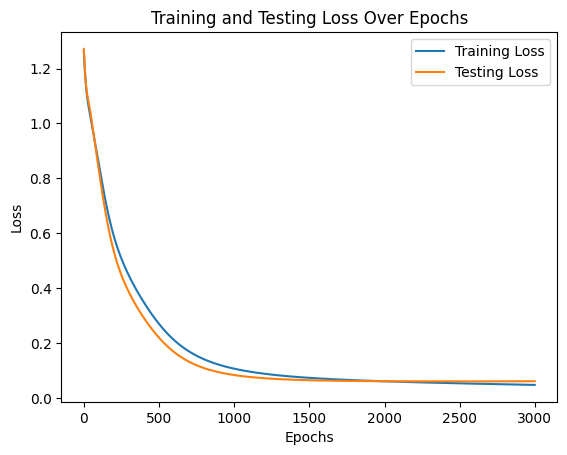

In [3]:
model = ANN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()   # NOTE: We select a classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 3000
train_losses = []
test_losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluation step on testing set
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}')

# Plotting the training and testing losses over epochs
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()

We appear to have achieved a cross-entropy loss of roughly $0.06$. Is that good? This can be hard to determine! Other evaluation metrics are often used to evaluate the performance of ML models for classification. Below we discuss several common metrics.

### 1. Accuracy

The accuracy is the proportion of correct predictions to the total number of predictions:
$$
\operatorname{accuracy}=\frac{\text{number of correct predictions}}{\text{total number of predictions}}.
$$

While relatively simple (high accuracy means a high ratio of correct predictions), accuracy can be misleading if the class distribution is imbalanced. For example, in our earlier meteorite-prediction example, an accuracy of $0.999$ might at first appear to be quite good, but might actually be the accuracy of always prediction "not a meteorite".

In [4]:
# Switch model to evaluation mode
model.eval()

# Calculate the number of correct predictions
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 96.00%


To determine how good this accuracy is, we can compute the probability of each label in the testing set.

In [5]:
import numpy as np

# Count the occurrences of each label and calculate probabilities
unique, counts = np.unique(y_test.numpy(), return_counts=True)
probabilities = counts / counts.sum()

# Printing the probabilities
print("Empirical probabilities of labels in the test set:")
for label, prob in zip(unique, probabilities):
    print(f"Label {label}: {prob:.2f}")

Empirical probabilities of labels in the test set:
Label 0: 0.39
Label 1: 0.31
Label 2: 0.31


That looks pretty good!

### 2. Confusion Matrix

While accuracy tells us how good the model is at making the correct predictions, it doesn't tell us how often it confuses different incorrect labels. For some problems some errors are more severe than others, and so this may be something we want to know. The conflusion matrix is a table that shows the probability that the model makes each possible (mis-)prediction.

That is, the confusion matrix is a matrix with one row per class (possible label) and one column per class. The $(i,j)^\text{th}$ entry holds the probability that a row with actual class $i$ will be classified as class $j$. In some cases, rather than computing the probability, the confusion matrix shows the number of points in the test set that fall into each category. Below is the code to compute the comfusion matrix for our model.

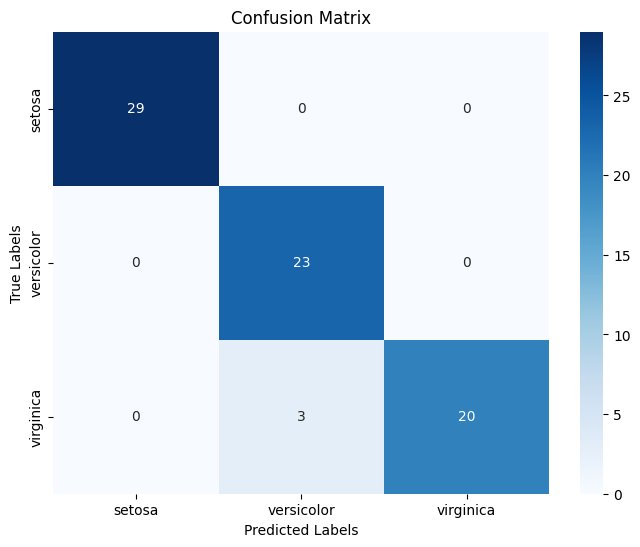

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model.eval()

# Get predictions
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

# Compute the confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted.numpy())

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Although the test set (and training set!) is relatively small for this problem, and so conclusions can't be made with high-confidence, it seems that our model primarily makes mistakes where it misclassifies "virginica" iris plants as "versicolor" iris plants.

**Note**: If this confusion matrix were to be normalized, each cell would be divided by the sum of the values in the same **row**. Hence, the entries $(i,j)^\text{th}$ row indicate how likely a point of class $i$ will be given each label by the model.

### 3. Precision, Recall, and F1-Score

For binary classification tasks, where one label is viewed as the "positive" label (e.g., $1$ when labels are $0$ and $1$), statistics like precision, recall, and the F1 score are often used to evaluate the model.

These metrics are often expressed in terms of the following statistics:
1. **True Positive (TP)**: The number of points (rows) with label $1$ and where the model predicted $1$.
2. **False Positive (FP)**: The number of points (rows) with label $0$, but where the model predicted $1$.
3. **False Negative (FN)**: The number of points (rows) with label $1$, but where the model predicted $0$.
4. **True Negative (TN)**: The number of points (rows) with label $0$ and where the model predicted $0$.

**Precision** measures the ratio of the correctly predicted positive labels to the total predicted positives. That is:
$$
\text{Precision}=\frac{\text{TP}}{\text{TP}+\text{FP}}.
$$

**Recall** measures the ratio of the correctly predicted positive labels to the total number of positives. That is:
$$
\text{Recall}=\frac{\text{TP}}{\text{TP}+\text{FN}}.
$$

For stochastic classifiers, these definitions can be generalized to account for the probability of each possible error. For example, precision is given by:
$$
\text{Precision}=\Pr(Y_i=1 | \hat Y_i = 1),
$$
and 
$$
\text{Recall}=\Pr(\hat Y_i=1 | Y_i = 1).
$$

The **F1 score** combines the precision and recall, and is given by the equation:
$$
\text{F}_1\text{ Score}=2 \frac{\text{precision}\cdot \text{recall}}{\text{precision} + \text{recall}}.
$$
This is the *harmonic mean* of the precision and recall, which places more weight on low values relative to the more common arithmetic mean.

The F1 score ranges from 0 to 1, where 1 denotes perfect precision and recall, and 0 means that either precision or recall is zero.

We won't compute these scores for our model, since it is not a binary classification model.

### 4. ROC and AUC

The **Receiver Operating Characteristic (ROC)** curve and the **Area Under the ROC Curve** (AUC) are two of the most common metrics for binary classification problems. **Unlike the other metrics, these methods assume that the parametric model's output is compared to a threshold. If the output is above the thresold, a label of 1 is predicted, and otherwise the label 0 is predicted.** By tuning this threshold parameter, you can adjust the tradeoff between different types of errors.

For example, if you are observing too many false positives, then the model is outputting the label 1 too often, and so the threshold can be increased. This will typically reduce the number of false positives, but may increase the number of false negatives.

ROC and AUC measure this trade-off. Unlike the other statistics that have been discussed, they aren't measuring the performance of a single parametric model for making predictions, but a range of parametric models (those that result from using different thresholds with your trained model).

Here is an example three ROC curves from Wikipedia. The horizontal axis depics the false positive rate: $\text{FPR}=\frac{\text{FP}}{\text{FP}+\text{TN}}$, while the vertical axis depicts the true positive rate: $\text{TPR}=\frac{\text{TP}}{\text{TP}+\text{FN}}$. Each point on the curve indicates that there is some threshold for selecting the positive label as the prediction of the model that results in the specified FPR and TPR:
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png">

The dashed line denotes the ROC curve that results from a random classifier (a model that outputs a sample from the continuous uniform distribution on $[0,1]$ without considering the input at all). Curves above this line are doing better than a random classifier, while curves below are doing worse than a random classifier (this shouldn't happen for any decent classifier!).

Notice that higher values are better, as they indicate that for any given FPR, the model can achieve a better TPR. 

The AUC is a statistic that summarizes a ROC curve by computing the area undernear the curve. For a perfect model, the ROC curve would have a TPR of one for all possible values of FPR, and hence the AUC (area under the ROC curve) would be one. A pessimal model (one that gets all predictions wrong) would have an AUC of zero. The random classifier achieves an AUC of 0.5.